# Support Vector Machines, Kernelization, Neural Nets
Also see Chapter 7.2

In [4]:
# Global imports and settings
from preamble import *
%matplotlib inline
#%load_ext autoreload
%autoreload 2
plt.rcParams['savefig.dpi'] = 120 # Use 300 for PDF, 100 for slides
#InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Linear SVMs
Recap

### Support vector machines

- In several other linear models, we minimized (misclassification) error
- In SVMs, the optimization objective is to maximize the _margin_
- The __margin__ is the distance between the separating hyperplane and the _support vectors_
- The __support vectors__ are the training samples closest to the hyperplane
- Intuition: large margins generalize better, small margins may be prone to overfitting

![SVC Image](./images/09_margin.png)  

### Maximum margin (theory)

How do we find the coefficients $w$ that lead to the largest margin?

For now, we assume that the data is linearly separable.  

The _positive hyperplane_ is defined as:  

$b +  \mathbf{w^{T}x_+} = 1$

with $\mathbf{x_+}$ the positive support vectors.

Likewise, the _negative hyperplane_ is defined as:  

$b +  \mathbf{w^{T}x_-} = -1$

Substracting them yields:

$\mathbf{w^{T}(x_+ - x_-)} = 2$

We can normalize by the length of vector $w$, defined as  

$||w|| = \sqrt{\sum_{j=1}^{m} w_{j}^{2}}$

Yielding  

$\frac{\mathbf{w^{T}(x_+ - x_-)}}{||w||} = \frac{2}{||w||}$

The left side can be interpreted as the distance between to positive and negative hyperplane, which is the _margin_ that we want to maximize.

Hence, we want to maximize $\frac{2}{||w||}$ under the constraint that all samples are classified correctly:

$b +  \mathbf{w^{T}x^{(i)}} \geq 1 \,\,\, if \,\,\, y^{(i)} = 1$  
$b +  \mathbf{w^{T}x^{(i)}} \leq -1 \,\,\, if \,\,\, y^{(i)} = -1$  

i.e. all negative examples should fall on one side of the negative hyperplane and vice versa. 

Hence, we want to optimize
$$f(w,b) = \frac{2}{||w||}$$

Under the constraint:

$$g(w,b) = y^{(i)} (b +  \mathbf{w^{T}x^{(i)}}) \geq 1 \,\,\, \forall i$$  

Maximizing $\frac{2}{||w||}$ can be done by minimizing $\frac{||w||^2}{2}$

This is a quadratic objective with linear inequality constraints, and can hence be solved using the _Lagrangian multiplier method_.

Geometric interpretation: optimize the convex function $f(w,b)$ (the 'hill') under the constraint $g(w,b)<1$ defined by our training data (the red line cutting the hill). Th highest point in this line is the optimum $(w_0,w_1)$: the values for $w$ for which the margin is largest and doesn't violate the constraints (i.e., it still separates the positives and negatives).

![lagrange](./images/09_langrange3.png)

This is actually solved by giving each point a weight (a.k.a. as _Langrangian multipliers_ or _dual coefficients_) $a_i$ and defining the feature weights as 
$$ \mathbf{w} = \sum_{i=1}^{l} a_i y_i \mathbf{x_i} $$

and imposing (much simpler) constraints on the $a$'s:

$$ \forall{i},  a_i \geq 0 $$ 
$$ \sum_{i=1}^{l} a_i y_i = 0 $$

- Instead of learning a coefficient per feature, we learn a coefficient by training point
    - Many of these $a$'s will be 0
    - The points where the $a$ is not 0 are our support vectors
- With these support vectors and weights, we can construct the maximal margin separating hyperplane

### Making predictions

After we find the support vectors #x# and their cofficients $a$, we can classify a new sample $u$ by looking at the sign of:  
$$f(x) = \mathbf{w}*\mathbf{u}+b = \sum_{i=1}^{l} a_i y_i \mathbf{x_i}*\mathbf{u}+b$$

This is similar to a _weighted k-nearest neighbor_ that only looks at the support vectors.

SVM result. The circled samples are support vectors, together with their coefficients.

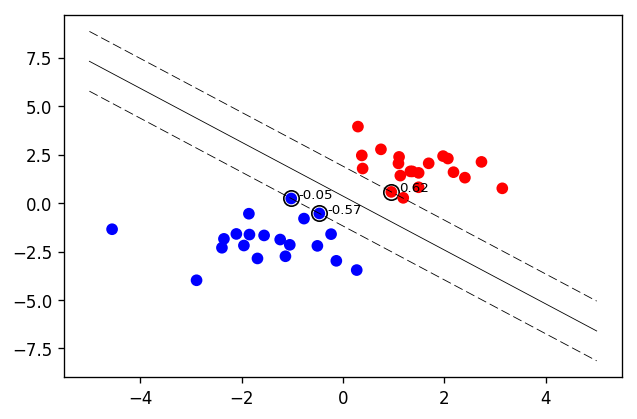

In [2]:
mglearn.plots.plot_svm_linear()

### Dealing with nonlinearly separable data

- If the data is not linearly separable, (hard) margin maximization becomes meaningless
    - The constraints would contradict
- We can allow for violatings of the margin constraint by introducing _slack variables_ $\xi^{(i)}$

$b +  \mathbf{w^{T}x^{(i)}} \geq 1 - \xi^{(i)}  \,\,\, if \,\,\, y^{(i)} = 1$  
$b +  \mathbf{w^{T}x^{(i)}} \leq -1 + \xi^{(i)} \,\,\, if \,\,\, y^{(i)} = -1$  

- The new objective (to be minimized) becomes:

$\frac{||w||^2}{2} + C (\sum_i \xi^{(i)})$

- $C$ is a penalty for misclassification
    - Large C: large error penalties
    - Small C: less strict about violations (more regularization)

- This is known as the _soft margin_ SVM (or _large margin_ SVM)
    - Some support vectors are exactly on the margin hyperplane, with margin = 1
    - Others are margin violators, with margin < 1 and a positive slack variable: $\xi^{(i)} > 0$
        - If $\xi^{(i)} \geq 1$, they are misclassified

Effect on linearly separable data
- Smaller C: larger margin, more support vectors, likely less oberfitting

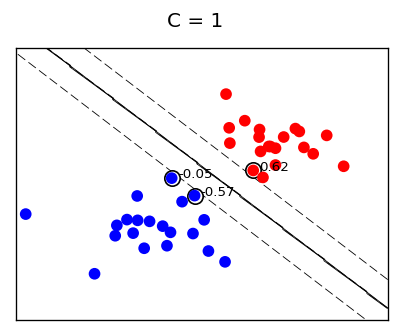

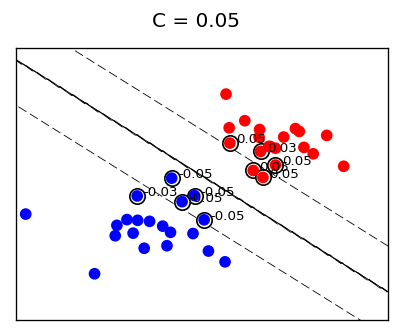

In [5]:
mglearn.plots.plot_svm_margins()

Effect on non-linearly separable data

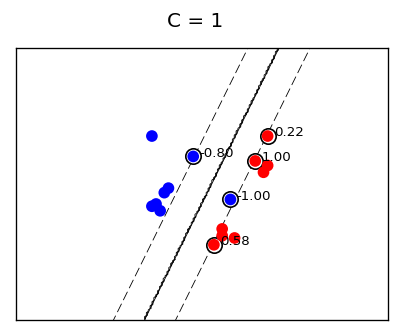

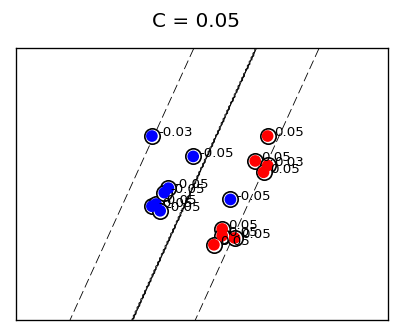

In [2]:
mglearn.plots.plot_svm_margins_nonlin()

## Kernelized Support Vector Machines

* Linear models work well in high dimensional spaces.
* You can _create_ additional dimensions yourself.
* Let's start with an example.

Our linear model doesn't fit the data well

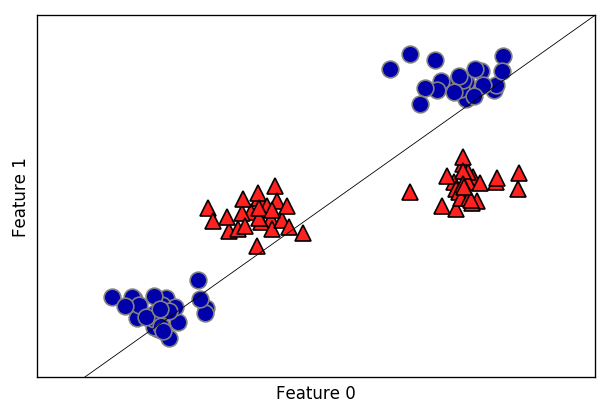

In [26]:
ml.plots.plot_kernelize()

We can add a new feature by taking the squares of feature1 values

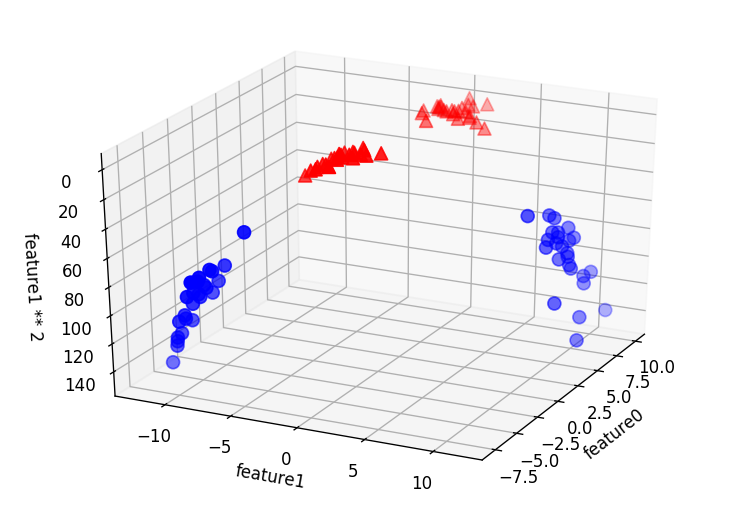

In [27]:
ml.plots.plot_kernelize2()

Now we can separate the data with a hyperplane

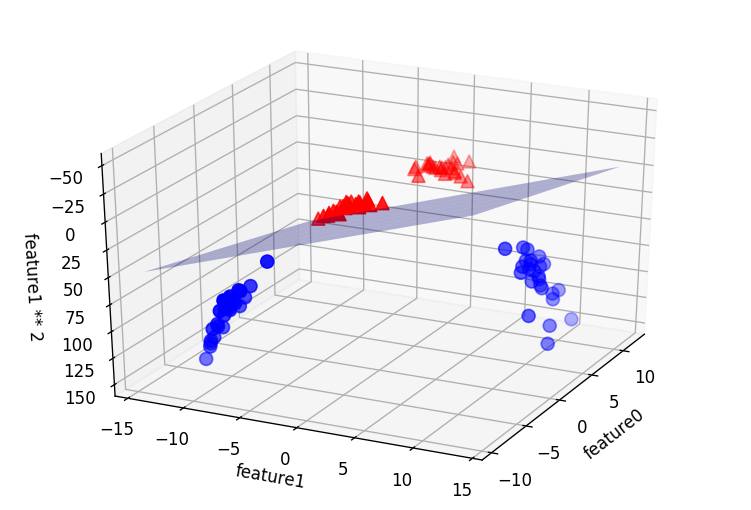

In [28]:
ml.plots.plot_kernelize3()

* When we predict the class for very possible point, we see that the decision boundary is now more of an ellipse

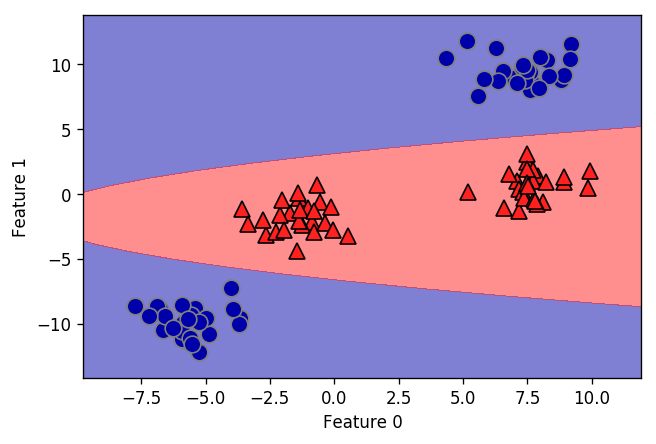

In [29]:
ml.plots.plot_kernelize4()

### The Kernel Trick

* Adding nonlinear features can make linear models much more powerful
* Often we don’t know which features to add, and adding many features might make computation very expensive
    * Especially computing distances in many dimensions is expensive
* Mathematical trick (_kernel trick_) allows us to directly compute distances (scalar products) in the high dimensional space
    * Only for specific distance functions
* A _kernel function_ is a distance (similarity) function with special properties for which this trick is possible
    * Polynomial kernel: computes all polynomials up to a certain degree of the original features
    * Gaussian kernel, or radial basis function (RBF): considers all possible polynomials of all degrees
        * Infinite high dimensional space (Hilbert space), where the importance of the features decreases for higher degrees

### Kernels (theory)

A (Mercer) Kernel on a space X is a (similarity) function  

$k: X \times X \rightarrow \mathbb{R}$

Of two arguments with the properties: 

- Symmetry: $k(x_1,x_2) = k(x_2,x_1) \,\,\, \forall x_1,x_2 \in X$
- Positive definite: for each finite subset of data points ${x_1,...,x_n}$, the kernel matrix is positive semi-definite

Kernel matrix = $K \in \mathbb{R}^{n \times n}$ with $K_{ij} = k(x_i,x_j)$

More precisely, Mercer's Theorem states that  
- there exists a high-dimensional (possibly infinite) space $\mathcal{H}$ (a.k.a. Hilbert space)
- and a continuous "feature map" $\phi: X \rightarrow \mathcal{H}$
- so that the kernel computes the inner product of the features $k(x_1,x_2)=⟨\phi(x_1),\phi(x_2)⟩$

Hence, a kernel can be thought of as a 'shortcut' computation for the 2-step procedure feature map + inner product

### Kernels: examples

- The inner product is a kernel. The standard inner product is the __linear kernel__:  
$k(x_1,x_2) = x_1^T x_2$

- Kernels can be constructed from other kernels $k_1$ and $k_2$:
    - For $\lambda \geq 0, \lambda . k_1$ is a kernel
    - $k_1 + k_2$ is a kernel
    - $k_1 . k_2$ is a kernel (thus also $k_1^n$)
- This allows to construct the __polynomial kernel__:  
$k(x_1,x_2) = (x_1^T x_2 + b)^d$, for $b \geq 0$ and $d \in \mathbb{N}$ 
- The 'radial' __Gaussian kernel__ (RBF kernel) is defined as:  
$k(x_1,x_2) = exp(-\gamma ||x_1 - x_2||^2)$, for $\gamma \geq 0$ 

![gamma](./images/09_gaussian_curves.png)

### The kernel trick: intuition

- An input $x \in X$ is mapped to the basis function $\phi(x) = k(x,·)$
    - For every point, the mappings are continuous functions $k(x,·)$
- Kernel computes ⟨k(x1,·),k(x2,·)⟩=k(x1,x2)
    - Similarity is high if points are close together according to the kernel
    - The more narrow the kernel is ($\gamma$), the closer the points need to be to be deemed similar


![gamma](./images/09_kernel_map.png)

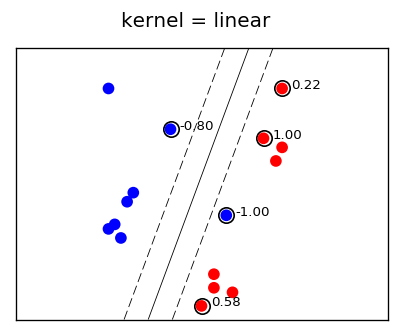

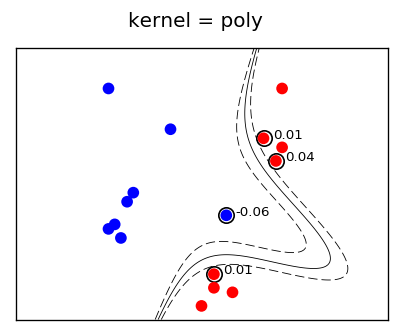

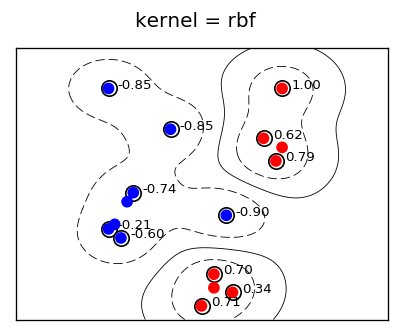

In [4]:
mglearn.plots.plot_svm_kernels()

### Tuning SVM parameters
Most important parameters:

* C (regularizer): limits the weights of the support vectors
    * Higher values: more regularization, less overfitting
* For RBF kernels: gamma (kernel width): high values means that points are further apart
    * Leads to many support vectors, narrow Gaussians, overfitting
    * Low values lead to underfitting
* For polynomial kernels: the _degree_ (exponent) defines the complexity of the models
    * Degree = 1 is a linear SVM
    * The high the degree, the more flexible the model, and the more prone to overfitting

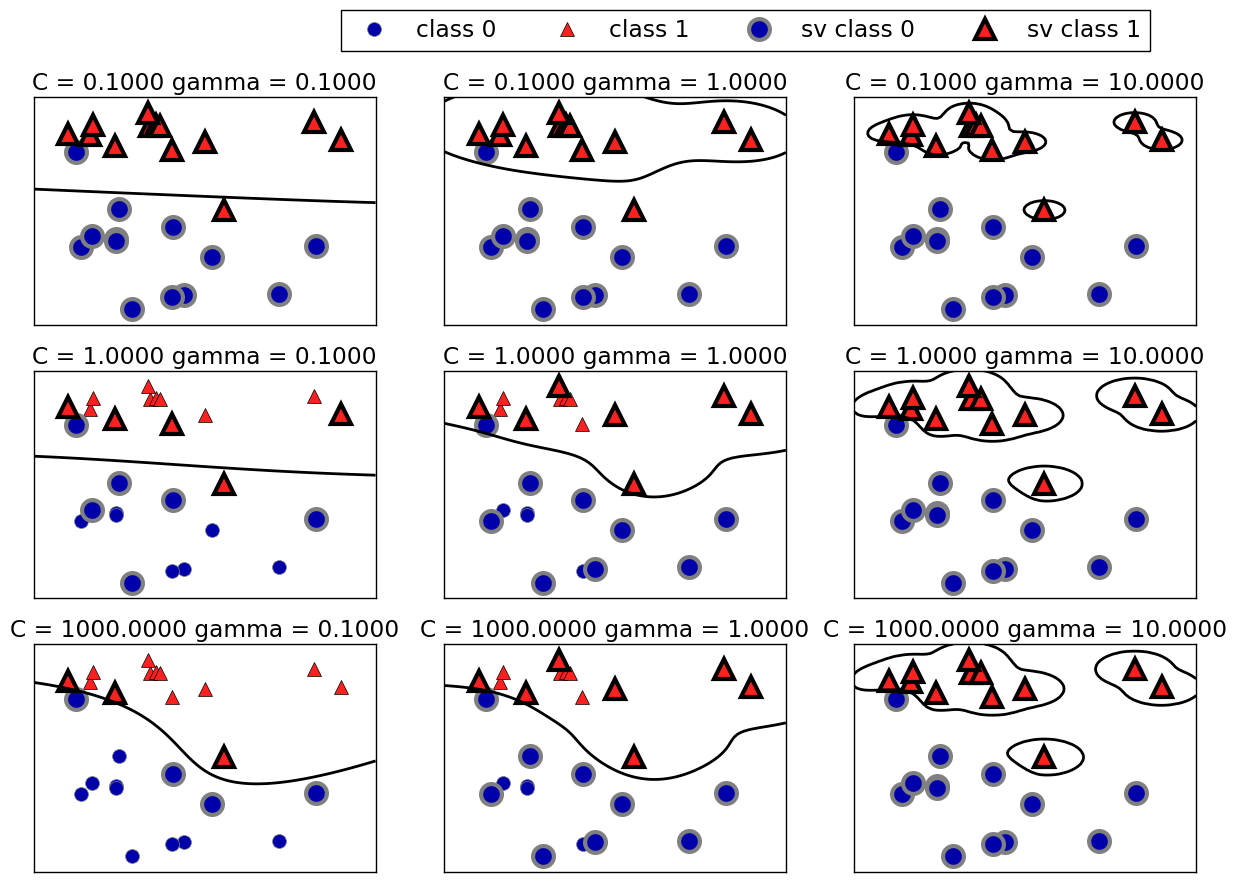

In [65]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2));

* Low gamma (left): wide Gaussians, very smooth decision boundaries
* High gamma (right): narrow Gaussians, boundaries focus on single points (high complexity)
* Low C (top): each support vector has very limited influence: many support vectores, almost linear decision boundary
* High C (bottom): Stronger influence, decision boundary bends to every support vector

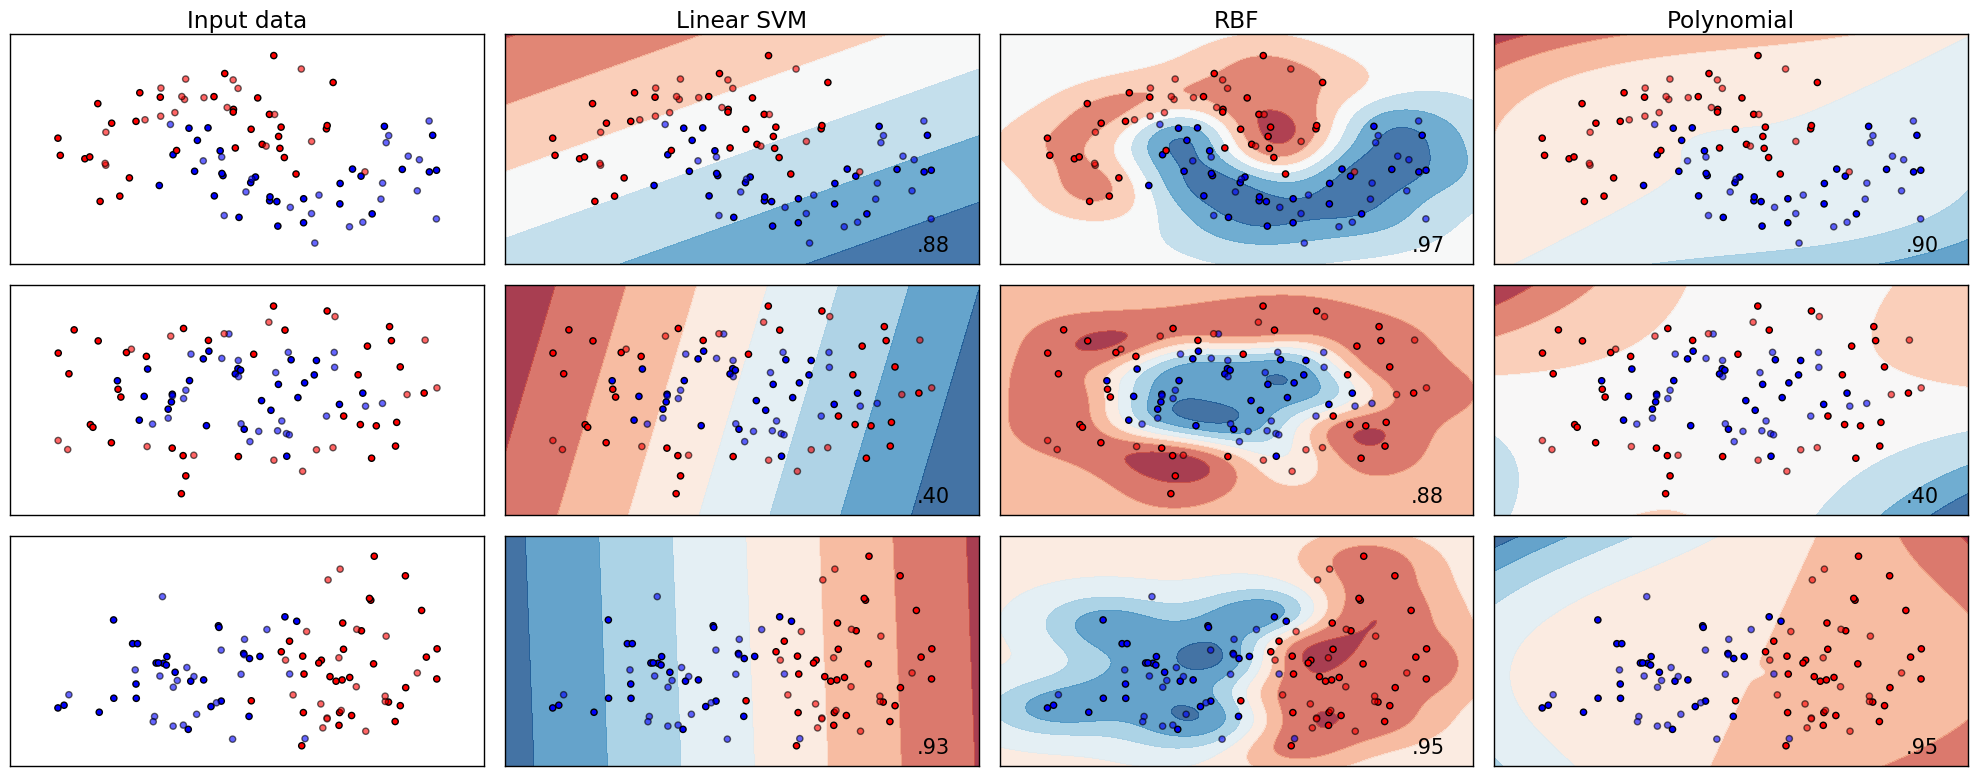

In [72]:
names = ["Linear SVM", "RBF", "Polynomial"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", degree=3, C=0.1)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))

### Preprocessing Data for SVMs
* SVMs are very sensitive to hyperparameter settings
* They expect all features to be approximately on the same scale
    * If not, they overfit easily

### Strengths, weaknesses and parameters

* SVMs allow complex decision boundaries, even with few features. 
* Work well on both low- and high-dimensional data

* Don't scale very well to large datasets (>100000)
* Require careful preprocessing of the data and tuning of the parameters. 
* SVM models are hard to inspect

Important parameters:
* regularization parameter _C_
* choice of the kernel and kernel-specific parameters
    * Typically string correlation with _C_

## Neural Networks (Multi-layer Perceptrons)
* An entirely different branch of machine learning, that aims to reverse-engineer the human brain
* Very successful in image/sound/time series data (deep learning)
* Here, we will only discuss multilayer perceptrons (MLPs) for classification and regression
    * Also known as _feed-forward networks_

How does the human brain learn?

- Neuron triggers, sends action potential (voltage) through axon
- Transmission across synapse is chemical
    - Action potential causes release of neurotransmitters
    - Diffuse over to other side, create signal in next dendrite
    - Synapse connection can be weak or strong
- **Hebbian learning**: neurons that fire together, wire together
    - Synapses grow stronger through experience
    - Long-term potentiation: more dendritic receptors

This can be modelled (in a very, very simplified way) by the _perceptron_:
* Neurons are nodes
* They each get a number of inputs (dendrites)
* And each input is weighted (synapse sensitivity)

Learning = learning the weights so that the input is mapped to the right output

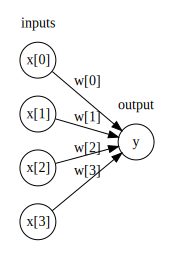

In [4]:
display(mglearn.plots.plot_logistic_regression_graph())

Note that this is exactly the same as a linear regressor:
        
$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b$

Hence, a perceptron can only learn linear functions

In a Multi-Layer Perceptron (MLP), this process is repeated multiple times:

* First compute _hidden units_
* Combine them again using a weighted sum to yield the outcome
* Many more weights to learn

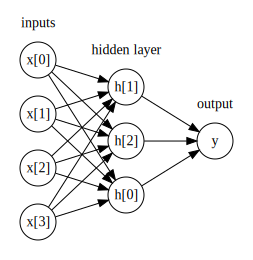

In [6]:
display(mglearn.plots.plot_single_hidden_layer_graph())

* But: a series of weighted sums is just a weighted sum, so our model remains linear
* For non-linear models, we need to apply a non-linear function on the weighted sum of the inputs
    * Also called the _activation function_
* Popular choices:
    * rectified linear unit (relu). Easy/fast to computee
    * sigmoid or tangens hyperbolicus (tanh). Mimics activation function of neurons
        * Default (hardcoded) in WEKA

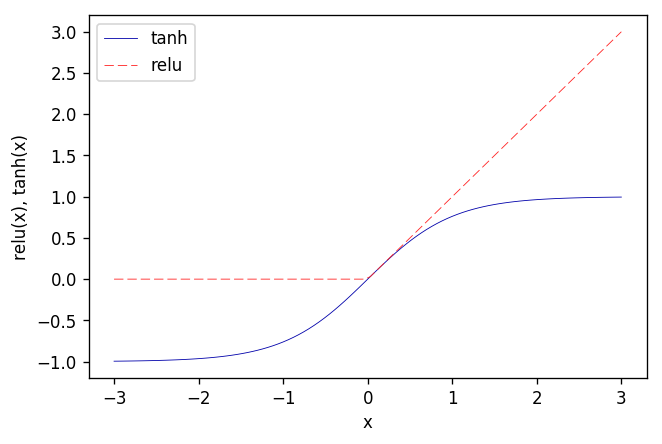

In [32]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

## Learning the weights
- The optimal weights are learned by minimize the squared error of the outputs:
$$E[w] = \frac{1}{2} \sum\limits_{d=1}^{n}  (t_d-o_d)^2 $$
with $n$ training examples, true outputs $t_d$
- Quadratic function of linear function of weight = quadratic functions of weights
    - Much easier to learn (no local minima)
    - True for perceptron (not general network)

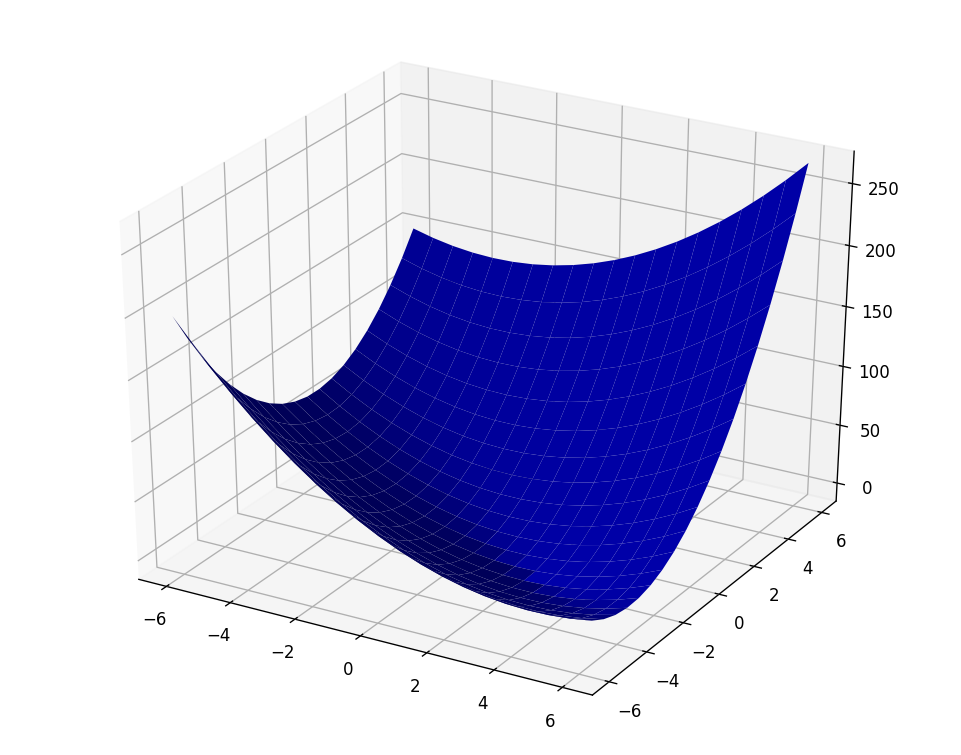

In [57]:
# Quadratic function that we want to optimize
ml.plots.plot_gradient_descent_surface()

## Gradient descent
- Find the set of weights for which the error is smallest
- Start at a random position, compute in which direction the gradient is largest
- Gradient:
$$\nabla E[w] = \left[ \frac{\delta E}{\delta w_0} , \frac{\delta E}{\delta w_1} , \ldots, \frac{\delta E}{\delta w_p} \right]$$
- Vector where each component is partial derivative of error with respect to that weight
    - Large value: move in that direction a lot
- Control how much you move it that direction by adding a _learning rate_ $\alpha$
- Training rule:
$$ \Delta w = - \alpha E[w] $$ 
i.e. 
$$ \Delta w_i = - \alpha \frac{\delta E}{\delta w_i} $$ 
- Iterate until converged in a (local) minimum

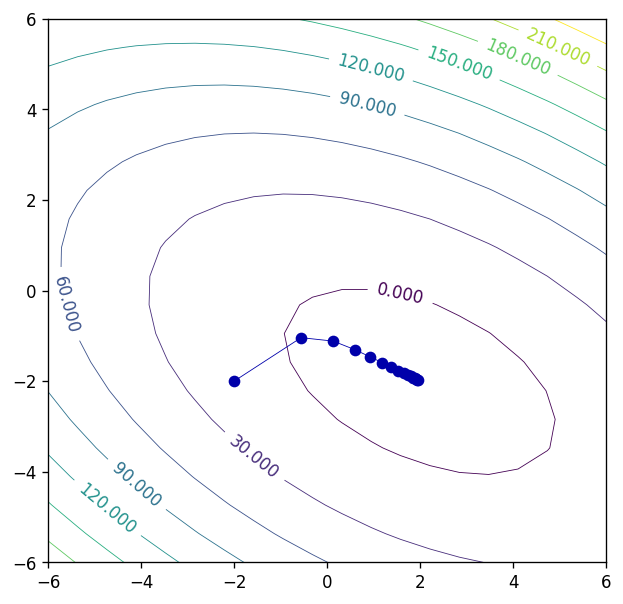

In [33]:
# Also try 0.01, 0.2, 0.27
ml.plots.plot_gradient_descent(alpha=0.12)

### Computing the gradient (theory)
- When derived (using the chain rule), we find a simple solution:
- Intuitively: move most the direction where the error is largest
\begin{align} 
\frac{\delta E}{\delta w_i} = \frac{\delta}{\delta w_i} \frac{1}{2} \sum_d (t_d-o_d)^2 \\ & 
 = \frac{1}{2} \sum_d \frac{\delta}{\delta w_i} (t_d-o_d)^2 \\ &
 = \frac{1}{2} \sum_d 2 (t_d-o_d) \frac{\delta}{\delta w_i} (t_d-o_d) \\ &
 = \sum_d (t_d-o_d) \frac{\delta}{\delta w_i} (t_d-w \cdotp x_d)\\ & 
 = \sum_d (t_d-o_d) (-x_{i,d})
\end{align}

### Gradient descent algorithm
- Initialize each $w_i$ to some small random value
- Until termination condition is met:
    - Initialize each $\Delta w_i$ to 0
    - For each (x,t) in training examples, do:
        $$\Delta w_i \leftarrow \Delta w_i + \alpha(t-o)x_i$$
    - For each linear unit weight w_i, do:
        $$w_i \leftarrow w_i + \Delta w_i $$
- The learning rate needs to be tuned carefully
    - Too small: you need many gradient descent iterations to converge (too slow)
    - Too large: you'll jump over the minimum and may not coverge at all

### Stochastic gradient descent
- Batch mode: look at all examples, compute gradient, update by that gradient
    - Ensures that we will find the local optimum if learning rat is small enough
- Stochastic gradient descent (incremental mode):
    - Update weights after each training example (of a given batch size)
    - Doesn't go straight to goal, but 'zigzags' towards it
- Works well in practice
    - Faster: you do more updates (even if they zigzag)
    - Noise may be helpful: avoids small local optima (bouncing ball)

We can now build arbitrarily complex models by adding more layers  
This yields many weights that need to be tuned

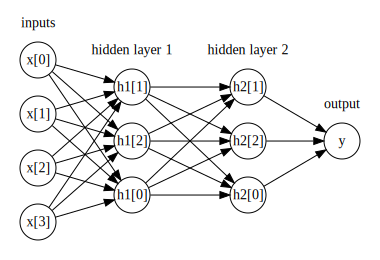

In [10]:
mglearn.plots.plot_two_hidden_layer_graph()

* We can control complexity (overfitting) in different ways:
    * Choosing the type of nonlinearity (sigmoid vs relu)
    * Add more/less hidden units
    * Add more/less hidden layers

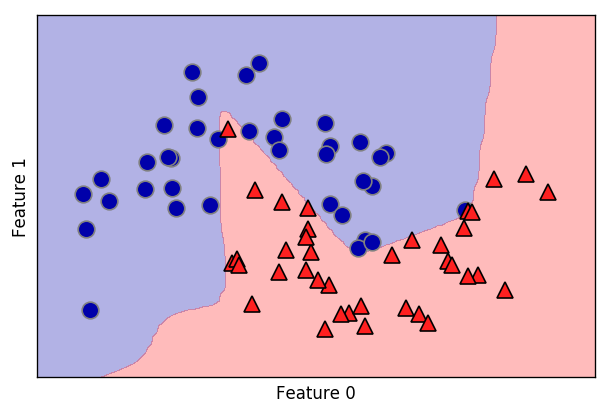

In [36]:
# using one layer, with 10 units, with tanh nonlinearity
# try using 100 or more units
ml.plots.plot_neural_predictions('tanh',[10])

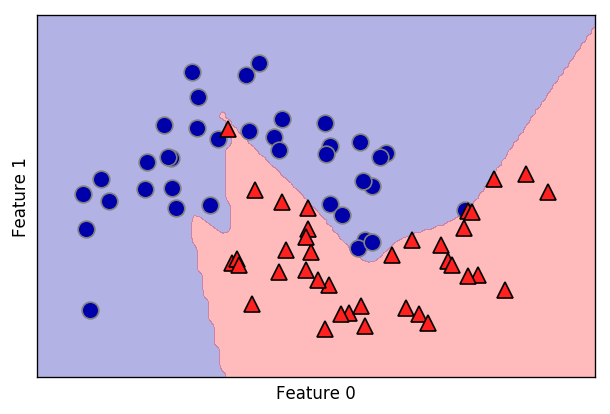

In [37]:
# using two hidden layers, with 10 units each, with tanh nonlinearity.
ml.plots.plot_neural_predictions('tanh',[10,10])

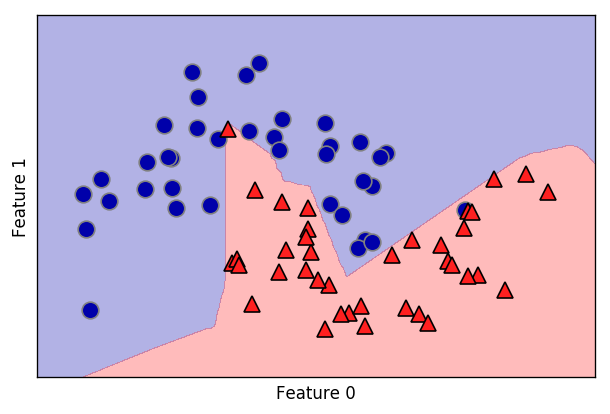

In [38]:
# Using one layer, with 10 unit, with relu nonlinearity
# Boundary is a colelction of straight lines
ml.plots.plot_neural_predictions('relu',[10,10])

## Backpropagation
- To train a larger neural net, we need a way to 'backpropagate' the error signal from output back through the layers
- How does changing the $j$ weights of neuron $k$ change the final error? $\frac{\delta E}{\delta w_{j,k}}$
- To compute those, we introduce an intermediate quantity: the 'error' in the signal of neuron $k$:
$$ \delta_k = - \frac{\delta E}{\delta u_k} $$
- The errors $\delta_k$ can be computed based on the errors in the next layer 
- Order of computation is back to front, ultimately relating $\delta_k$ to $\frac{\delta E}{\delta w_{j,k}}$

### Understanding $\delta_k$
- Imagine a demon that adds a little change $\Delta u_k$ to the input of neuron $k$
    - The neuron now outputs $\sigma(u_k + \Delta u_k)$ instead of $\sigma(u_k)$
    - Propagates through network, ultimately causing an error $\frac{\delta E}{\delta u_k} \Delta u_k$
- A good demon helps you improve the error by trying to find a $\Delta u_k$ that reduces the error
    - If $\frac{\delta E}{\delta u_k}$ is large, choose $\Delta u_k$ to reduce it

![Tampering with the weights creates an error downstream.](./images/09_demon.png)

### Backpropagation algorithm
- Initialize all weights to small random numbers
- Until convergence, do:
    - For each training example, do:
        - Forward pass: propagate example, compute outputs
        - For each output unit $k$:
        $$\delta_k = o_k(1-o_k)(t_k-o_k)$$
        - For each hidden unit $h$:
        $$\delta_h = o_h(1-o_h)\sum_{k \in outs(h)} \delta_k w_{k,h}$$
        - Update each network weight:
        $$w_{i,j} = w_{i,j} + \Delta w_{i,j} \quad \text{where} \quad \Delta w_{i,j} = \eta \delta_j x_{i,j}$$
- You can use batch or stochastic gradient descent
- There exist efficient techniques using matrix products


### Properties of backprop
- Does gradient descent over entire network weight vector
- Works on any directed graph (doesn't require layers)
- Will find a local (not global) optimum
    - Works well in practice, with restarts (epochs)
    - Learning rate will never be optimal everywhere (slow)
- Speedup by including weight *momentum $\alpha$*
    - Like a ball accellerating down the hill
    - Also helps avoid local minima
$$\Delta w_{i,j}(n) = \eta \delta_j x_{i,j} + \alpha \Delta w_{i,j}(n-1)$$
- Minimizes error over training example (can still overfit)
- Training can take thousands of iterations (slow)
- Using networks after training is very fast 

### Properties of backprop
- Convergence: avoid local minima
    - Add momentum
    - Stochastic gradient descent
    - Restart with different initial weights
    - Initialize weights near zero: start with near-linear networks
- Expressiveness
    - Can approximate any bounded continuous function, with arbitrarily small error, by 1-layer network
        - Linear combination of sigmoid functions
    - Any function can be approximated, with arbitrarily small error, by 2-layer network.

## Reducing overfitting
- If you keep adding hidden units, you can just memorize the input
- Penalize large weights by complexity penalty $\gamma$ (weight decay):
$$ E(w) = \frac{1}{2} \sum_{d \in D} \sum_{k \in outputs} (t_{k,d} - o_{k,d})^2 + \gamma \sum_{i,j} w_{j,i}^2$$
- Weight sharing: let inputs share the same weights
    - in vision problems: nearby weights should have similar values 
    - convolutional neural networks do this implicitly
- Early stopping
    - Use a validation set and detect when test error goes up
    - Equivalent to weight decay if you start with small weights

## Strengths, weaknesses and parameters

Benefits:
* State of the art in many machine learning applications
    * Especially image or sequential data (video, text,...)
* Can build hugely complex models given enough data and time

Drawbacks:
* Require careful tuning of parameters
* Require a lot of data and computation time
* Work best with homogeneous data (all features have same meaning)

### Estimating complexity in neural networks

Important hyperparameters:

- number of layers
- number of hidden units per layer
- general architecture (especially for deep learning)
- gradient descent algorithm 
    - `sgd` Stochastic Gradient Descent (has many more parameters)
    - More modern algorithms exist (but not in WEKA), eg. `adam`, `lbfgs`

Common technique:

- Create large enough network so it can overfit
- Then, shrink the network
- Other strategies exist (not in WEKA)
    - regularization: penalty on the sizes of the learned weights
    - dropout: randomly switch off connections or entire nodes

### Algorithm Summary

* Nearest neighbors
    - For small datasets (slow), good as a baseline, easy to explain. 
* Linear models
    - Go-to as a first algorithm to try, good for very large datasets, good for very high- dimensional data.
* Naive Bayes
    - Only for classification. Even faster than linear models, good for very large data‐ sets and high-dimensional data. Often less accurate than linear models.
* Decision trees
    - Very fast, don’t need scaling of the data, can be visualized and easily explained.
* Random forests (and bagged decision tree)
    - Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data.
* Boosted decision trees
    - Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
* Support vector machines
    - Powerful for medium-sized datasets of features with similar meaning. Require scaling of data, sensitive to parameters.
* Neural networks
    - Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train
    
In order to select an algorithm (and hyperparameter values), we always need to test them on the data at hand. 

You _can_ actually learn which algorithms to use for which types of datasets. This is called _meta-learning_, but out of scope for this course.